<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_TensorFlow/blob/main/02FashionMNISTData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
class FashionMNIST(tf.keras.Model):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.batch_size = batch_size
        self.resize = resize
        self.train, self.val = tf.keras.datasets.fashion_mnist.load_data()

    def text_labels(self, indices):
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        data = self.train if train else self.val
        process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                                tf.cast(y, dtype='int32'))
        resize_fn = lambda X, y: (tf.image.resize_with_pad(X, *self.resize), y)
        shuffle_buf = len(data[0]) if train else 1
        return tf.data.Dataset.from_tensor_slices(process(*data)).batch(
            self.batch_size).map(resize_fn).shuffle(shuffle_buf)
    def train_dataloader(self):
        return self.get_dataloader(True)

    def val_dataloader(self):
        return self.get_dataloader(False)

    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        show_images(tf.squeeze(X), nrows, ncols, titles=labels)

In [3]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if tf.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

In [4]:
data = FashionMNIST(resize=(32, 32))
len(data.train[0]), len(data.val[0])

(60000, 10000)

In [5]:
data.train[0][0].shape

(28, 28)

In [6]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

(64, 32, 32, 1) <dtype: 'float32'> (64,) <dtype: 'int32'>


In [7]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'2.91 sec'

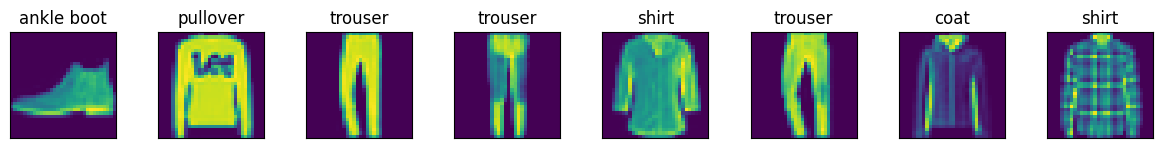

In [8]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)